In [ ]:
import sklearn.model_selection
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

**Data Loading**

In [ ]:

print(os.listdir('/kaggle/input/my-awesome-dataset'))


['OPTION1_uk_road_accident_2019_coursework_final.csv']


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/my-awesome-dataset/OPTION1_uk_road_accident_2019_coursework_final.csv')

> Printing Column and rows

In [ ]:
print(df.head())
print(df.columns)


  accident_index  speed_limit light_conditions weather_conditions  \
0  2019010225080           30         darkness              other   
1  2019200908684           30         darkness               fine   
2  2019040860897           40         daylight               fine   
3  2019460847205           40         daylight               fine   
4  2019051911581           30         daylight               fine   

  road_surface_conditions      vehicle_type  \
0             wet or damp  at least one van   
1                     dry         only cars   
2                     dry         only cars   
3                     dry         only cars   
4                     dry         only cars   

                        junction_location    skidding_and_overturning  \
0      at or within 20 metres of junction  no skidding or overturning   
1      at or within 20 metres of junction  no skidding or overturning   
2      at or within 20 metres of junction  no skidding or overturning   
3  not at 

> Data Visualization

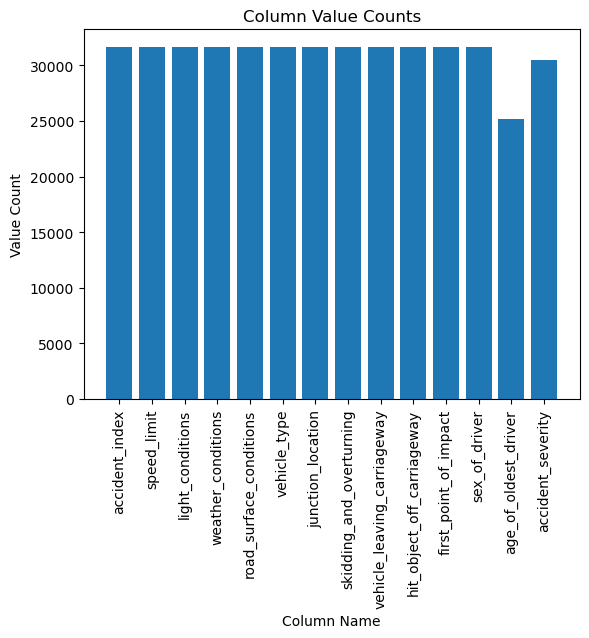

In [ ]:
# Count the number of occurrences of each column
counts = df.count()

# Create a bar chart
plt.bar(counts.index, counts.values)

# Set the chart title and axis labels
plt.title('Column Value Counts')
plt.xlabel('Column Name')
plt.ylabel('Value Count')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Show the chart
plt.show()

Information about data

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accident_index               31647 non-null  object 
 1   speed_limit                  31647 non-null  int64  
 2   light_conditions             31647 non-null  object 
 3   weather_conditions           31647 non-null  object 
 4   road_surface_conditions      31647 non-null  object 
 5   vehicle_type                 31647 non-null  object 
 6   junction_location            31647 non-null  object 
 7   skidding_and_overturning     31647 non-null  object 
 8   vehicle_leaving_carriageway  31647 non-null  object 
 9   hit_object_off_carriageway   31647 non-null  object 
 10  first_point_of_impact        31647 non-null  object 
 11  sex_of_driver                31647 non-null  object 
 12  age_of_oldest_driver         25197 non-null  float64
 13  accident_severit

> Dropping accident_index

In [ ]:
df.drop('accident_index', axis=1, inplace=True)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   speed_limit                  31647 non-null  int64  
 1   light_conditions             31647 non-null  object 
 2   weather_conditions           31647 non-null  object 
 3   road_surface_conditions      31647 non-null  object 
 4   vehicle_type                 31647 non-null  object 
 5   junction_location            31647 non-null  object 
 6   skidding_and_overturning     31647 non-null  object 
 7   vehicle_leaving_carriageway  31647 non-null  object 
 8   hit_object_off_carriageway   31647 non-null  object 
 9   first_point_of_impact        31647 non-null  object 
 10  sex_of_driver                31647 non-null  object 
 11  age_of_oldest_driver         25197 non-null  float64
 12  accident_severity            30475 non-null  object 
dtypes: float64(1), i

> check for inconsistent values

In [ ]:
print(df['accident_severity'].unique())


['serious' 'fatal' 'slight' nan 'Serious' 'Slight' 'Fatal']


In [ ]:
print(df['accident_severity'].value_counts())


slight     12672
serious    11592
fatal       6159
Serious       25
Slight        19
Fatal          8
Name: accident_severity, dtype: int64


> correlation heatmap

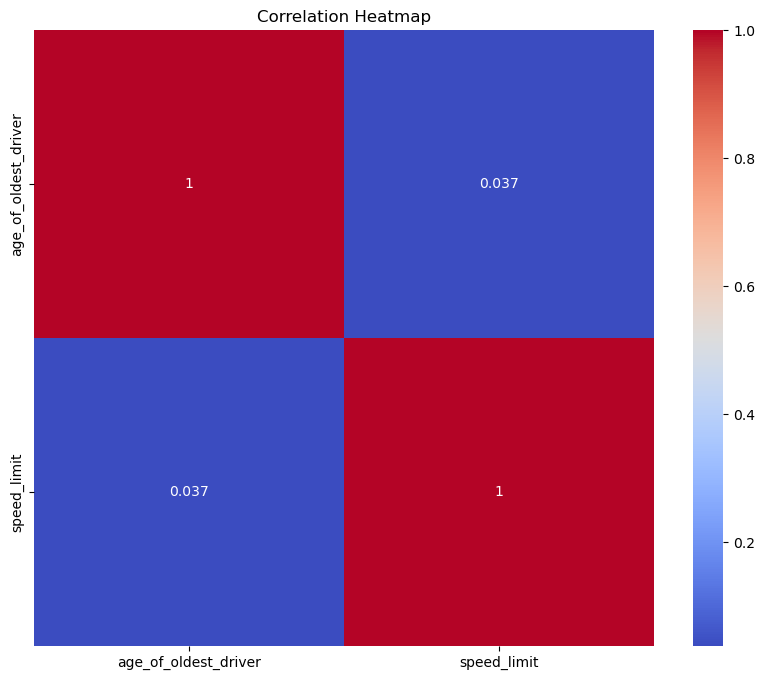

In [ ]:
# Sort the dataframe columns alphabetically
df_sorted = df.sort_index(axis=1)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_sorted.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

> Distribution of accident_severity

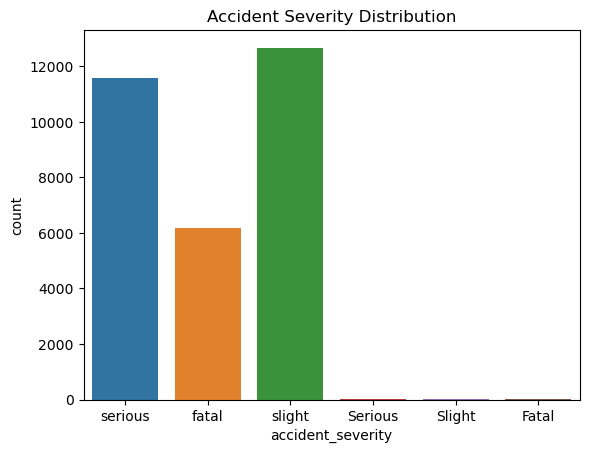

In [ ]:
sns.countplot(x='accident_severity', data=df)
plt.title('Accident Severity Distribution')
plt.show()

> Shape of data

In [ ]:
print(df.shape)

(31647, 13)


> Finding the types of data

In [ ]:
print(df.dtypes)


speed_limit                      int64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver           float64
accident_severity               object
dtype: object


> Identifying the outliers

In [ ]:
outliers = df[(zscore(df.select_dtypes(include='number')) > 3).any(axis=1)]
num_outliers = len(outliers)
print("Number of outliers:", num_outliers)



Number of outliers: 0


**Missing Value**

In [ ]:

missing_values = df.isnull().sum()

print(missing_values)

speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6450
accident_severity              1172
dtype: int64


**Duplicate Value**

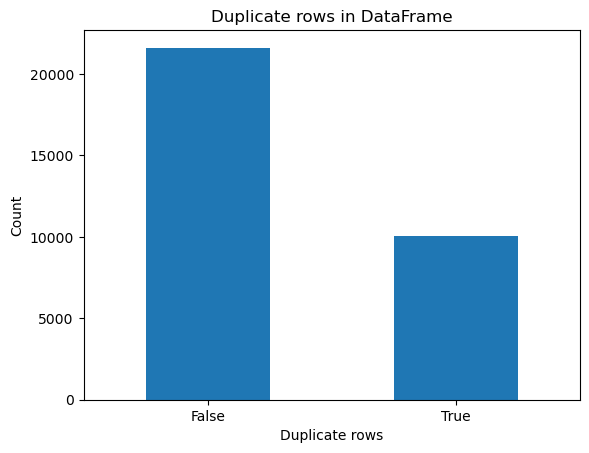

In [ ]:
# Count the number of occurrences of each row
duplicates = df.duplicated()
counts = duplicates.value_counts()

# Create a bar chart
counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Duplicate rows')
plt.ylabel('Count')
plt.title('Duplicate rows in DataFrame')
plt.show()


**Data Cleansing**

> Handling missing value

In [ ]:
# Drop rows with missing values in 'accident_severity' column
df.dropna(subset=['accident_severity'], inplace=True)

# Replace missing values in 'age_of_oldest_driver' column with the median
median_age = df['age_of_oldest_driver'].median()
df['age_of_oldest_driver'].fillna(median_age, inplace=True)


In [ ]:
# Check if there are any missing values left
print(df.isnull().sum())

speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
accident_severity              0
dtype: int64


> After missing value handling

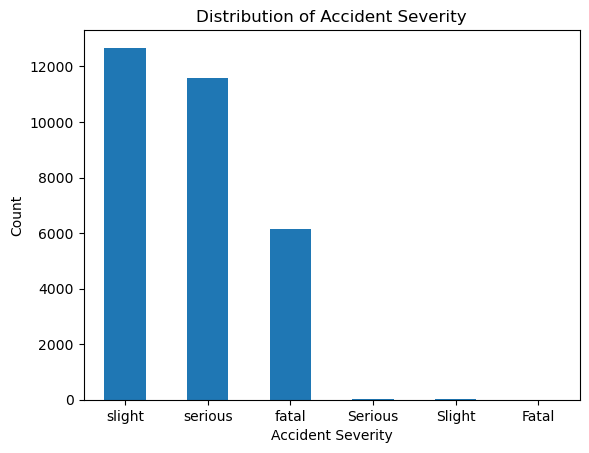

In [ ]:
# Count the number of occurrences of each accident severity
counts = df['accident_severity'].value_counts()

# Create a bar chart
counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.title('Distribution of Accident Severity')
plt.show()

> Handling Duplicate value

In [ ]:
# Check for duplicate rows based on all columns
duplicates_before = df.duplicated()

# Print the count of duplicate rows before handling
print("Count of duplicate rows before handling:", duplicates_before.sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check for duplicate rows again after handling
duplicates_after = df.duplicated()

# Print the count of duplicate rows after handling
print("Count of duplicate rows after handling:", duplicates_after.sum())


Count of duplicate rows before handling: 10087
Count of duplicate rows after handling: 0


> standardize the labels

In [ ]:
# Convert values to lowercase
df['accident_severity'] = df['accident_severity'].str.lower()

# Replace inconsistent values with standard values
df['accident_severity'] = df['accident_severity'].replace({'serious': 'serious',
                                                           'slight': 'slight',
                                                           'fatal': 'fatal',
                                                           's': 'serious',
                                                           'sligh': 'slight',
                                                           'fat': 'fatal',
                                                           'fata': 'fatal'})


In [ ]:
# Check unique values in the column
print(df['accident_severity'].unique())

# Check value counts of each unique value in the column
print(df['accident_severity'].value_counts())


['serious' 'fatal' 'slight']
serious    8072
slight     7290
fatal      5026
Name: accident_severity, dtype: int64


**Data Balancing**

serious    8072
fatal      7290
slight     7290
Name: accident_severity, dtype: int64


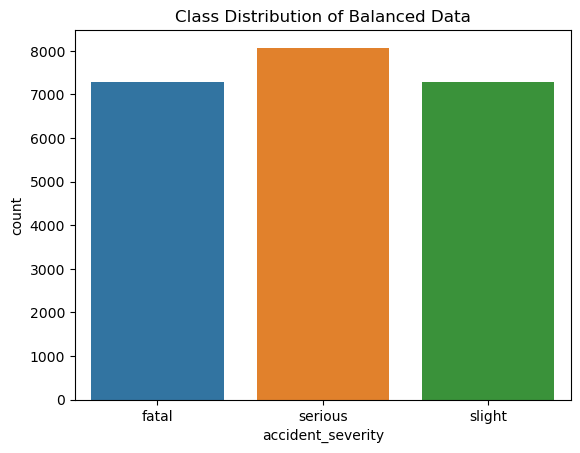

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Define the oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# Define the undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# Resample the data using both oversampling and undersampling
X_over, y_over = oversample.fit_resample(df.drop('accident_severity', axis=1), df['accident_severity'])
X_balanced, y_balanced = undersample.fit_resample(X_over, y_over)

# Store the balanced data in a new dataframe
df_balanced = pd.concat([pd.DataFrame(X_balanced), pd.Series(y_balanced)], axis=1)
df_balanced.columns = df.columns

# Print the class distribution of the balanced data
print(df_balanced['accident_severity'].value_counts())

# Plot the class distribution of the balanced data
sns.countplot(x='accident_severity', data=df_balanced)
plt.title('Class Distribution of Balanced Data')
plt.show()


> Label Encoding

In [ ]:
print(df_balanced.dtypes)

speed_limit                      int64
light_conditions                object
weather_conditions              object
road_surface_conditions         object
vehicle_type                    object
junction_location               object
skidding_and_overturning        object
vehicle_leaving_carriageway     object
hit_object_off_carriageway      object
first_point_of_impact           object
sex_of_driver                   object
age_of_oldest_driver           float64
accident_severity               object
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = ['light_conditions', 'weather_conditions', 'road_surface_conditions',                    'vehicle_type', 'junction_location', 'skidding_and_overturning',                    'vehicle_leaving_carriageway', 'hit_object_off_carriageway',                    'first_point_of_impact', 'sex_of_driver', 'accident_severity']

# Apply label encoding to categorical columns
le = LabelEncoder()
df_balanced[categorical_cols] = df_balanced[categorical_cols].apply(lambda col: le.fit_transform(col))

# Print the resulting dataframe
print(df_balanced)


       speed_limit  light_conditions  weather_conditions  \
0               60                 0                   1   
1               60                 0                   1   
2               70                 0                   1   
3               70                 1                   1   
4               30                 0                   1   
...            ...               ...                 ...   
22647           50                 1                   1   
22648           50                 1                   1   
22649           30                 1                   1   
22650           20                 1                   1   
22651           70                 1                   1   

       road_surface_conditions  vehicle_type  junction_location  \
0                            4             4                  2   
1                            4             4                  0   
2                            1             4                  2   
3          

In [ ]:
print(df_balanced.dtypes)

speed_limit                      int64
light_conditions                 int64
weather_conditions               int64
road_surface_conditions          int64
vehicle_type                     int64
junction_location                int64
skidding_and_overturning         int64
vehicle_leaving_carriageway      int64
hit_object_off_carriageway       int64
first_point_of_impact            int64
sex_of_driver                    int64
age_of_oldest_driver           float64
accident_severity                int64
dtype: object


> Encode age_of_oldest_driver float to int

In [ ]:
df_balanced['age_of_oldest_driver'] = df_balanced['age_of_oldest_driver'].astype(int)


> All int64 now

In [ ]:
print(df_balanced.dtypes)

speed_limit                    int64
light_conditions               int64
weather_conditions             int64
road_surface_conditions        int64
vehicle_type                   int64
junction_location              int64
skidding_and_overturning       int64
vehicle_leaving_carriageway    int64
hit_object_off_carriageway     int64
first_point_of_impact          int64
sex_of_driver                  int64
age_of_oldest_driver           int64
accident_severity              int64
dtype: object


> Converting to numpy array

In [ ]:
# assume df_balanced is your Pandas DataFrame
np_array = df_balanced.values
print(type(np_array))

<class 'numpy.ndarray'>


In [ ]:
df_balanced = np_array


In [ ]:
print(type(df_balanced))

<class 'numpy.ndarray'>


**Spliting dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = np_array[:,:-1] # get all columns except the last column
y = np_array[:,-1] # get the last column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (18121, 12)
y_train shape: (18121,)
X_test shape: (4531, 12)
y_test shape: (4531,)


**PCA**

In [ ]:
from sklearn.decomposition import PCA
import numpy as np


# create a PCA object with n_components=2
pca = PCA(n_components=2)

# fit the PCA object to your training feature set and transform it
X_train_pca = pca.fit_transform(X_train)

# transform your testing feature set using the fitted PCA object
X_test_pca = pca.transform(X_test)

# check the shapes of your transformed feature sets
print(X_train_pca.shape)  # should be (number of training samples, 2)
print(X_test_pca.shape)  # should be (number of testing samples, 2)


For visulaization

In [ ]:
import matplotlib.pyplot as plt

# plot the reduced training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.title('PCA Reduced Data (Training Set)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# plot the reduced testing data
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
plt.title('PCA Reduced Data (Testing Set)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

**Model Building**

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
reg = LinearRegression()

# Train the model on the training data
reg.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = reg.predict(X_test)

# Calculate the R-squared score
r2 = reg.score(X_test, y_test)

print('R-Squared Score:', r2)


R-Squared Score: 0.27752024743105264


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a decision tree classifier object
dt = DecisionTreeClassifier()

# Train the model on the training data
dt.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = dt.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.6168616199514456


**KNN Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Train the model on the training data
knn.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.5828735378503641


**PCA**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np


# perform PCA to reduce the dimensionality of X_train and X_test
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# train a logistic regression model on the reduced feature space
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# evaluate the model on the test set
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4575148973736482


**SVM**

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7342749944824543


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


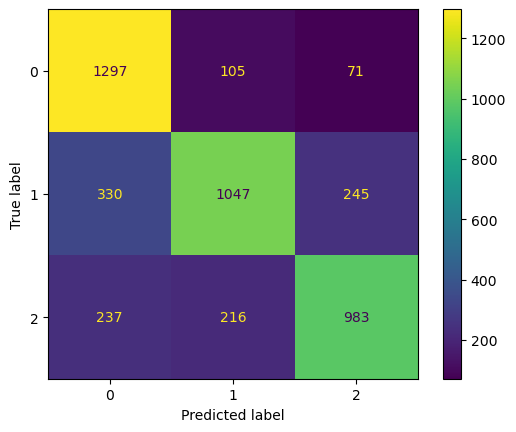

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an SVM model
svm_model = svm.SVC()

# Use GridSearchCV to find the optimal hyperparameters
grid_search = GridSearchCV(svm_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on the test data using the best hyperparameters
y_pred = grid_search.predict(X_test)

# Compute the accuracy of the model using the best hyperparameters
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test)


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create an SVM model
svm_model = svm.SVC(kernel='linear')

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.6398146104612669


**Naive Bayes classifier using the Gaussian Naive Bayes algorithm:

**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# train the model using the training set
nb.fit(X_train, y_train)

# make predictions on the test set
y_pred = nb.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6109026704921651


**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# create a Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()

# fit the model on training data
gb_model.fit(X_train, y_train)

# make predictions on test data
y_pred = gb_model.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7367027146325315


> using different hyper-perameter

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# create a Gradient Boosting Classifier model with different hyperparameters
gb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=5)

# fit the model on the training data
gb_clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = gb_clf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# create confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])

# # plot confusion matrix
# cm_display.plot()
# plt.title("Confusion Matrix for Gradient Boosting Classifier")
# plt.show()



Accuracy: 0.7285367468549989


**XGBoost Classifier**

Accuracy: 0.7355992054734054


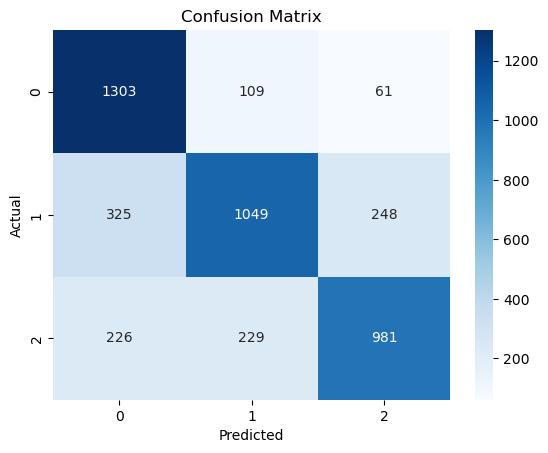

In [ ]:


from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate the classifier model
xgb_model = XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()


**Logistic Regression**

Accuracy: 0.6654160229529905


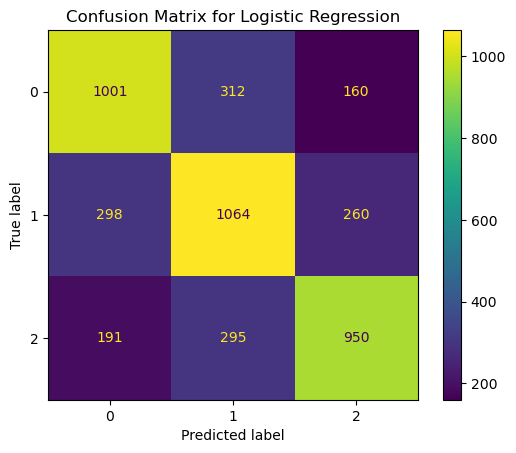

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# create a Logistic Regression model
lr_model = LogisticRegression()

# fit the model on training data
lr_model.fit(X_train, y_train)

# make predictions on test data
y_pred = lr_model.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
cm_display = ConfusionMatrixDisplay(cm, display_labels=lr_model.classes_)
cm_display.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()



**Random Forest Classifier model with hyperparameter tuning using Grid**

Accuracy: 0.6559258441845067


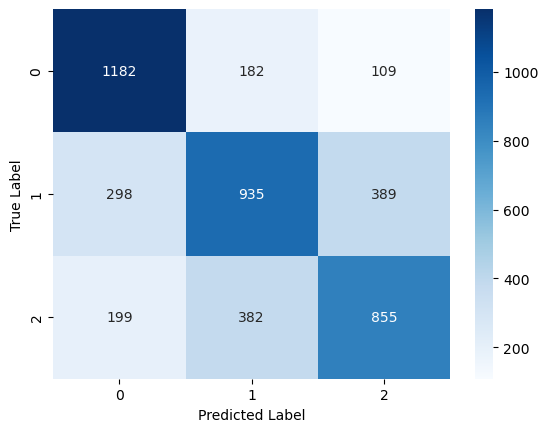

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Neural**

Epoch 1/50
567/567 [==============================] - 4s 6ms/step - loss: -42.5981 - accuracy: 0.4033 - val_loss: -194.6045 - val_accuracy: 0.4377
Epoch 2/50
567/567 [==============================] - 1s 2ms/step - loss: -872.7704 - accuracy: 0.4331 - val_loss: -1823.9017 - val_accuracy: 0.4335
Epoch 3/50
567/567 [==============================] - 1s 2ms/step - loss: -3797.6360 - accuracy: 0.4216 - val_loss: -5884.4048 - val_accuracy: 0.4268
Epoch 4/50
567/567 [==============================] - 2s 3ms/step - loss: -9513.3271 - accuracy: 0.4170 - val_loss: -12872.1484 - val_accuracy: 0.4268
Epoch 5/50
567/567 [==============================] - 1s 3ms/step - loss: -18537.2207 - accuracy: 0.4187 - val_loss: -23344.2305 - val_accuracy: 0.4310
Epoch 6/50
567/567 [==============================] - 2s 3ms/step - loss: -31212.7910 - accuracy: 0.4138 - val_loss: -37304.8008 - val_accuracy: 0.4416
Epoch 7/50
567/567 [==============================] - 2s 3ms/step - loss: -48076.6836 - accuracy: 0

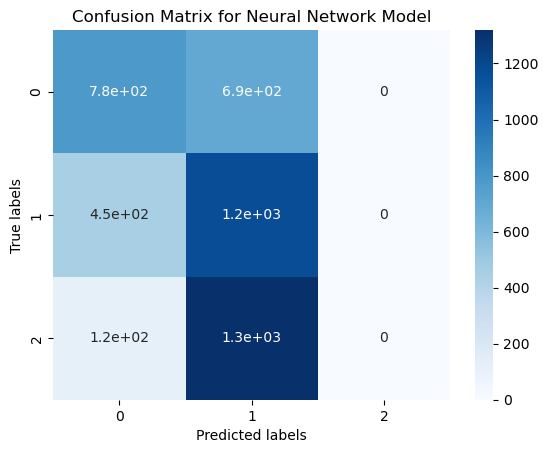

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

# create model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model on training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# make predictions on test data
y_pred = model.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix for Neural Network Model")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


**Train Test validation **

Epoch 1/50
567/567 [==============================] - 2s 3ms/step - loss: -6.8892 - accuracy: 0.3705 - val_loss: -30.5863 - val_accuracy: 0.4072
Epoch 2/50
567/567 [==============================] - 1s 3ms/step - loss: -138.2974 - accuracy: 0.4140 - val_loss: -288.6869 - val_accuracy: 0.4182
Epoch 3/50
567/567 [==============================] - 1s 3ms/step - loss: -592.5170 - accuracy: 0.4218 - val_loss: -917.6821 - val_accuracy: 0.4123
Epoch 4/50
567/567 [==============================] - 1s 2ms/step - loss: -1474.2219 - accuracy: 0.4168 - val_loss: -1992.5580 - val_accuracy: 0.4209
Epoch 5/50
567/567 [==============================] - 1s 2ms/step - loss: -2852.1924 - accuracy: 0.4260 - val_loss: -3561.8547 - val_accuracy: 0.4249
Epoch 6/50
567/567 [==============================] - 1s 2ms/step - loss: -4768.7305 - accuracy: 0.4248 - val_loss: -5679.6895 - val_accuracy: 0.4253
Epoch 7/50
567/567 [==============================] - 1s 2ms/step - loss: -7258.6782 - accuracy: 0.4227 - val

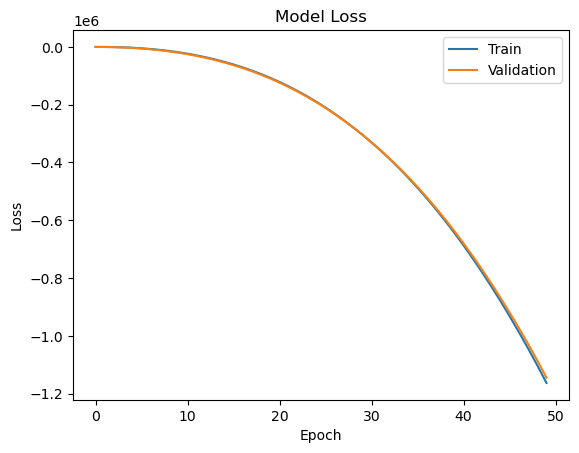

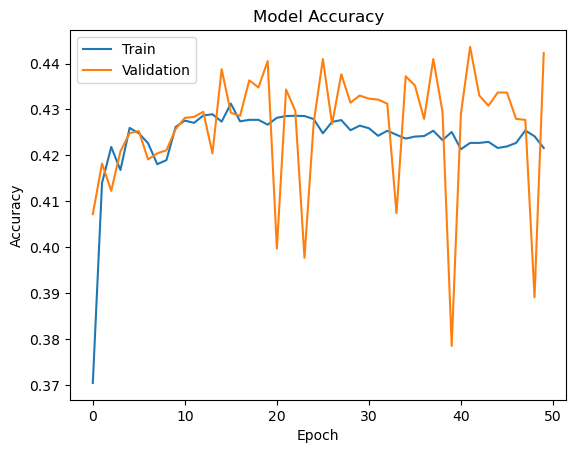

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# define the neural network architecture
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# set up early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# train the model and store training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1, callbacks=[early_stop])

# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
